# Boosting
- Esse fica como exercício
- Replique o mesmo problema anterior usando o [AdaBoosting](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html) 

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np
from matplotlib.colors import ListedColormap 
from sklearn.ensemble import AdaBoostClassifier


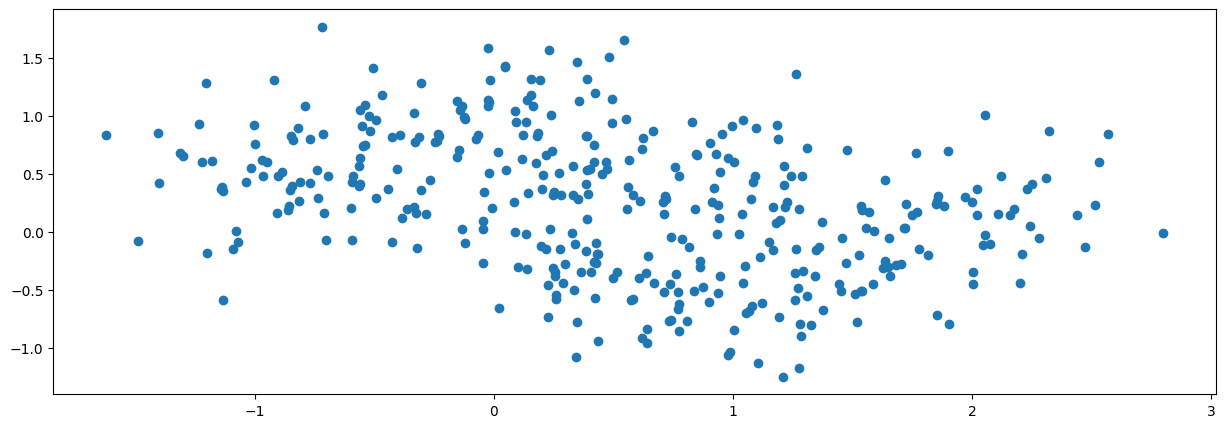

In [19]:
X, y = make_moons(n_samples=500, noise=0.3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

fig, ax = plt.subplots(figsize=(15,5))
ax.scatter(X_train[:,0], X_train[:,1])

In [20]:
adaboost_500 = AdaBoostClassifier(n_estimators=500, random_state=42)
adaboost_500.fit(X_train, y_train)

y_pred = adaboost_500.predict(X_test)

accuracy_score(y_test, y_pred)

/home/thiago_lahass/miniconda3/envs/mycondaenv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


0.872

In [21]:
adaboost_50 = AdaBoostClassifier(n_estimators=50, random_state=42)
adaboost_50.fit(X_train, y_train)

y_pred = adaboost_50.predict(X_test)

accuracy_score(y_test, y_pred)

/home/thiago_lahass/miniconda3/envs/mycondaenv/lib/python3.12/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


0.904

In [22]:
def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.45, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

Text(0, 0.5, '')

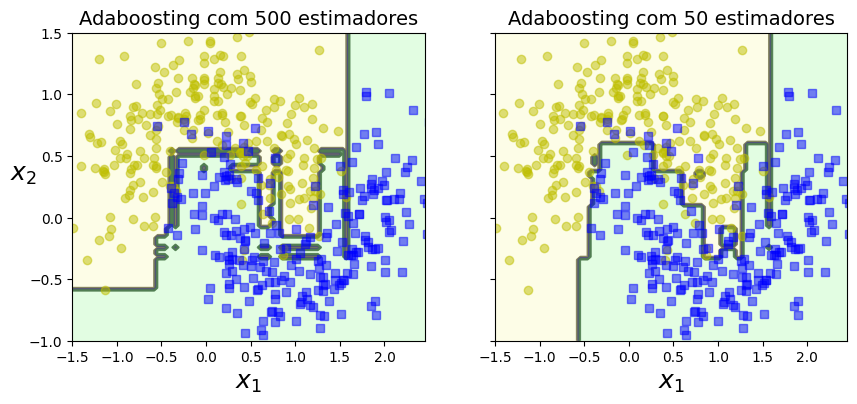

In [23]:
fig, axes = plt.subplots(ncols=2, figsize=(10,4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(adaboost_500, X, y)
plt.title("Adaboosting com 500 estimadores", fontsize=14)
plt.sca(axes[1])
plot_decision_boundary(adaboost_50, X, y)
plt.title("Adaboosting com 50 estimadores", fontsize=14)
plt.ylabel("")